##Preprocesamiento 


In [2]:
##Se importan las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
## Cargamos el dataset
df = pd.read_csv('tracks.csv')

##Validamos datos nulos y duplicados
print(f"Datos nulos:\n{df.isnull().mean()*100}")
##La cantidad de faltantes es practicamente 0, por lo que no es necesario realizar imputacion
print("---------------------------------------------")
print(f"Datos duplicados:\n{df.duplicated().sum()}")
##Se evidencia que no existen registros duplicados para el dataset



Datos nulos:
id                  0.000000
name                0.012102
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
artists             0.000000
id_artists          0.000000
release_date        0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.000000
dtype: float64
---------------------------------------------
Datos duplicados:
0


In [4]:
##Información general de las columnas

print(df.describe())

          popularity   duration_ms       explicit   danceability  \
count  586672.000000  5.866720e+05  586672.000000  586672.000000   
mean       27.570053  2.300512e+05       0.044086       0.563594   
std        18.370642  1.265261e+05       0.205286       0.166103   
min         0.000000  3.344000e+03       0.000000       0.000000   
25%        13.000000  1.750930e+05       0.000000       0.453000   
50%        27.000000  2.148930e+05       0.000000       0.577000   
75%        41.000000  2.638670e+05       0.000000       0.686000   
max       100.000000  5.621218e+06       1.000000       0.991000   

              energy            key       loudness           mode  \
count  586672.000000  586672.000000  586672.000000  586672.000000   
mean        0.542036       5.221603     -10.206067       0.658797   
std         0.251923       3.519423       5.089328       0.474114   
min         0.000000       0.000000     -60.000000       0.000000   
25%         0.343000       2.000000     -1

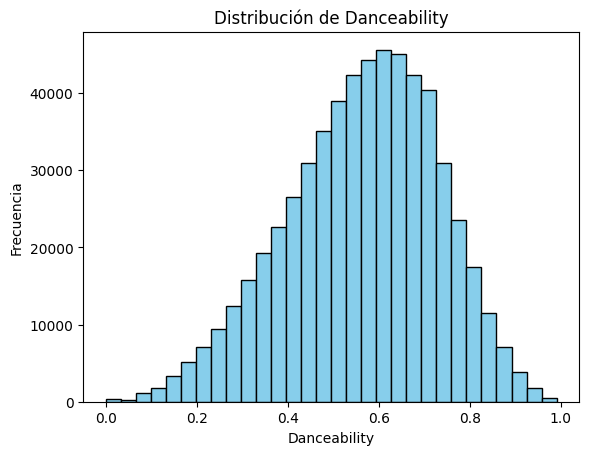

In [5]:
##Graficas para ver el comportamiento de las variables en cuanto a sus valores


# histograma de una variable
plt.hist(df['danceability'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frecuencia')
plt.show()


##El histograma de la variable Danceability presente una leve simetría positva al evidenciarse que la mayoría de canciones tienen valores mas cercanos al 0.6 que al 0.5, sigue teniendo forma de camapana, los datos del dataset de tracks presenta una distribución aproximadamente normal, no muy lejana al medio. 

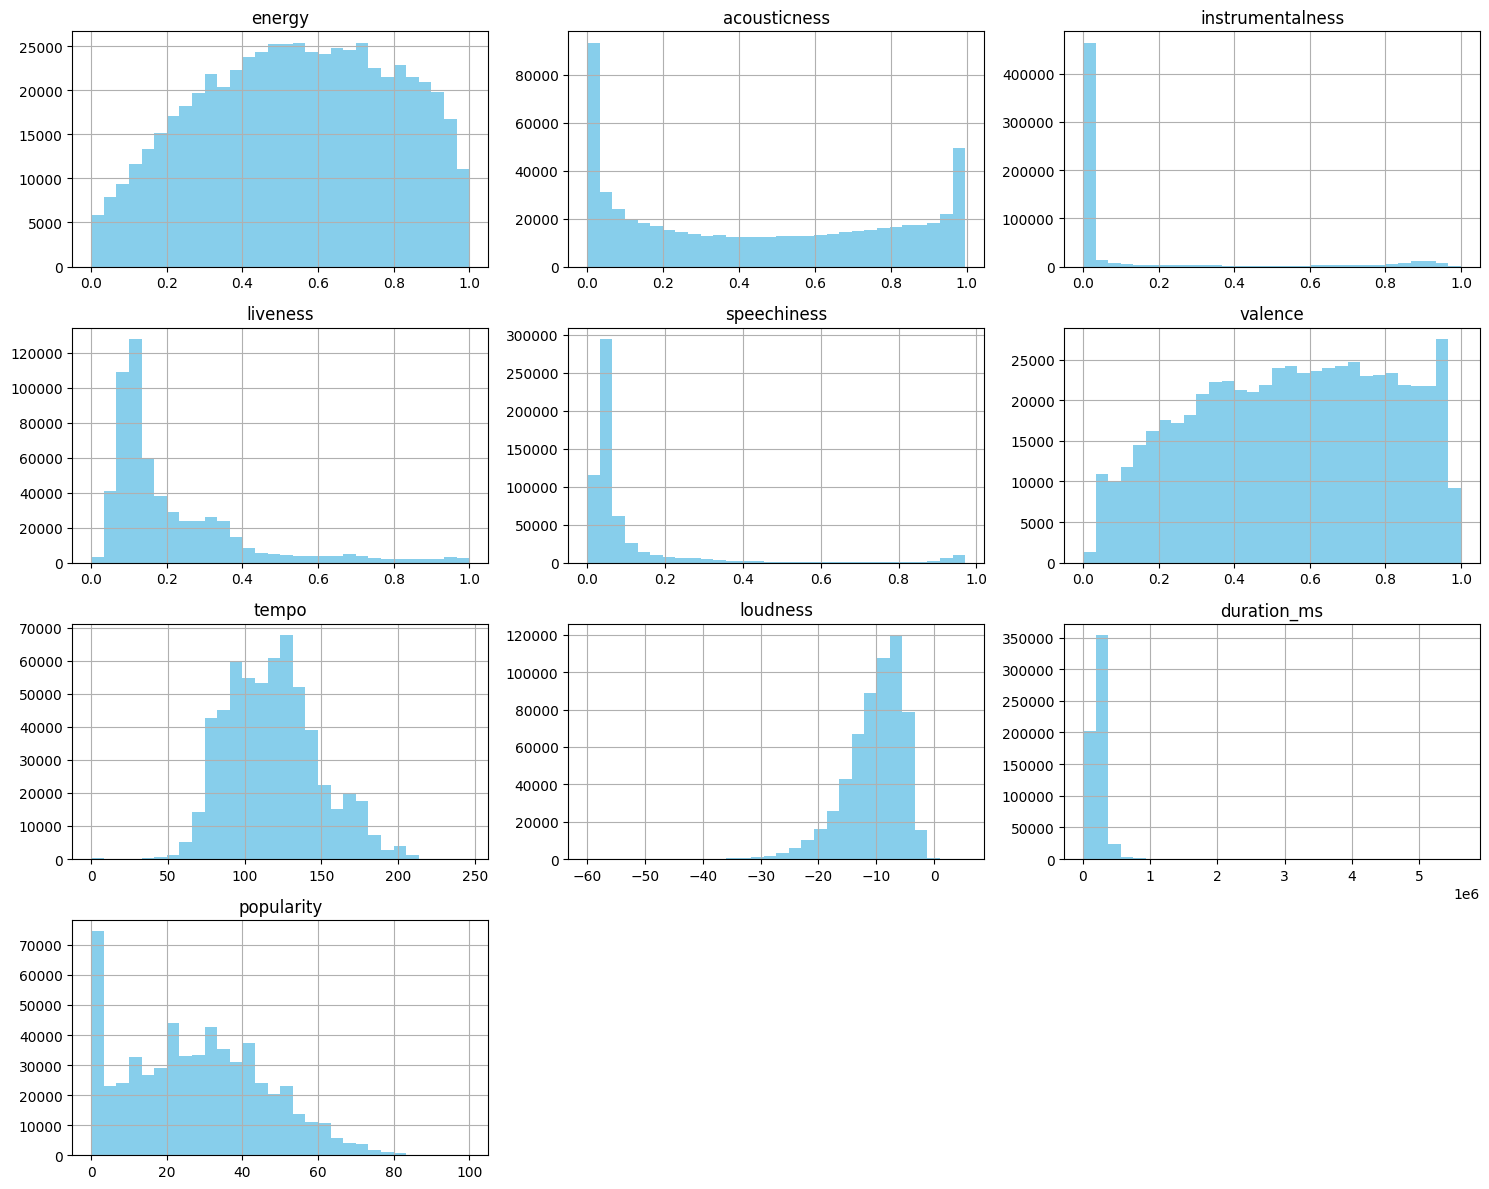

In [8]:
##Se exploran otras variables numericas mediante histograma con el fin de saber como estan distribuidos los datos


numeric_cols = ['energy', 'acousticness', 
                'instrumentalness', 'liveness', 'speechiness', 
                'valence', 'tempo', 'loudness', 'duration_ms', 
                'popularity']

df[numeric_cols].hist(bins=30, figsize=(15,12), color='skyblue')
plt.tight_layout()
plt.show()



##Los datos presentan distribuciones variables, unicamente Danceability presenta una distribución lo más cercano a lo normal. Adicional a esto como se puede ver en el describe(), para la variable de duracion de la canción, se esta utilizando datos en escala de milisegundos, llevando a utilizar datos muy grandes, por lo que se considera que sería oportuno cambiar la escala entre 0 a 6, de manera que los valores no sean tan grandes y se mas facil de interpretar y comparar. 

In [12]:
##Ahora se revisan los boxplot con el fin de identificar posibles outliers en las variables numericas


Q1 = df['danceability'].quantile(0.25)
Q3 = df['danceability'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
##Mostrar resultados obtenidos que estén por fuera de los límites
df[(df['danceability'] < lim_inf) | (df['danceability'] > lim_sup)]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
817,2WTtJDfCUjAyCZHRSfCLDn,La Mina del Ford - Remasterizado,1,133947,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1924-03-29,0.0000,0.025800,5,-24.894,1,0.0000,0.996000,0.768,0.0831,0.0000,0.00,0
1013,5tQsQaMquCXBREb1FNymi7,Oh Mujer Mujer - Remasterizado,0,170253,0,['Francisco Canaro'],['2maQMqxNnlRrBrS1oAsrX9'],1924-07-12,0.0000,0.315000,8,-15.969,0,0.0000,0.996000,0.956,0.3750,0.0000,0.00,0
1043,6VweawuAyN9Ad9ikn9f5W3,Shangai Bay - Remasterizado,0,129027,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1924-03-29,0.0000,0.082900,6,-24.272,1,0.0000,0.996000,0.893,0.1230,0.0000,0.00,0
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0000,0.000000,0,-60.000,0,0.0000,0.000000,0.000,0.0000,0.0000,0.00,0
1423,2fKnluaRpiiCFHWwKFkIgN,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0000,0.000000,0,-60.000,0,0.0000,0.000000,0.000,0.0000,0.0000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586506,2LsevvtdFSKb8ztwOvQXf0,Brown Noise,50,570654,0,['Brown Noise'],['4H1DT9A2uoT7pTVRDSolnk'],2013-03-21,0.0000,0.000020,0,-16.517,1,0.0000,0.119000,0.429,0.4670,0.0000,0.00,0
586535,33wp91bmIk1XYn7aKxMone,Clean White Noise,37,72652,0,"['Spa', 'Spa, Relaxation and Dreams', 'Relax M...","['4LUYOHM73gVlfY5TzRbIgX', '2Kb4gv8jSstDI7ygRh...",2015-12-10,0.0000,0.000020,9,-8.327,1,0.0000,0.112000,0.331,0.6630,0.0000,0.00,0
586536,2jhzrWv6ut9eieePWaYRC8,Spa Rain,45,97220,0,['Rain Sounds'],['5nSGBmlgUdqWNExnOX8VtV'],2015-12-14,0.0000,0.007430,8,-19.901,1,0.0000,0.000001,0.807,0.4140,0.0000,0.00,0
586543,7EqliudQ8vxJbZrD5x4URl,"Warmth (No Fade, Seamless Loop)",47,180000,0,['White Noise Therapy'],['1O7bUkov2v71fDS60GOfMD'],2015-09-30,0.0000,0.000515,7,-26.041,0,0.0000,0.697000,0.382,0.1110,0.0000,0.00,0


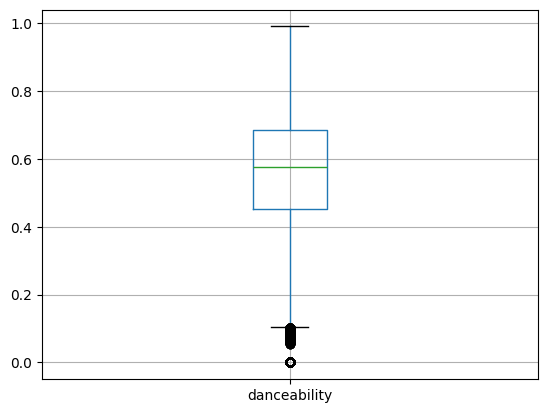

In [13]:
##Grafica del boxplot

df.boxplot(column="danceability")
plt.show()

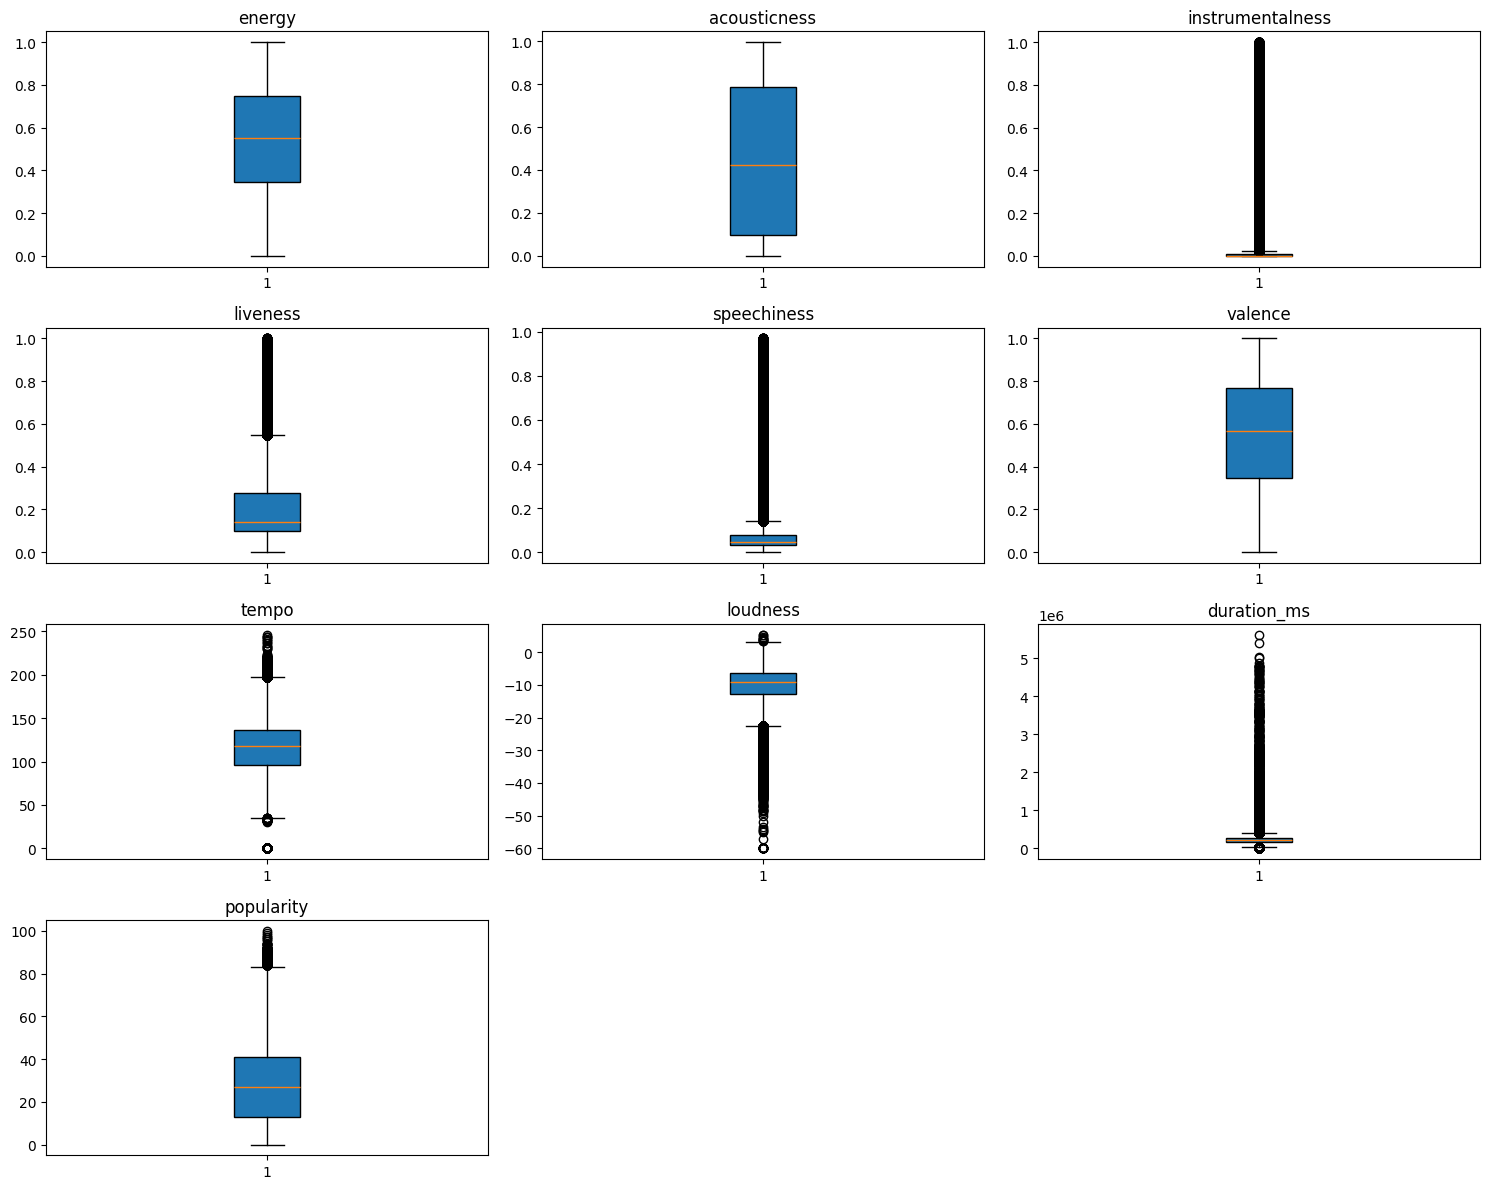

In [14]:
# Lista de columnas numéricas
numeric_cols = ['energy', 'acousticness', 
                'instrumentalness', 'liveness', 'speechiness', 
                'valence', 'tempo', 'loudness', 'duration_ms', 
                'popularity']

# Crear subplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)  # 4 filas, 3 columnas
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(col)

plt.tight_layout()
plt.show()